In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
np.random.seed(42)
data = {
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 65, size=100),
    'Average_Spend': np.random.uniform(5, 50, size=100),
    'Visits_per_Week': np.random.uniform(1, 7, size=100),
    'Promotion_Interest': np.random.randint(1, 11, size=100)
}

# Convert to a DataFrame
df = pd.DataFrame(data)
df.head()

CustomerID  Age  Average_Spend  Visits_per_Week  Promotion_Interest
0           1   56      18.206968         5.266897                   2
1           2   46       5.633592         5.857006                   9
2           3   32      13.947908         3.091996                   8
3           4   60      37.010388         1.577059                  10
4           5   25      40.557899         6.643140                   7

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

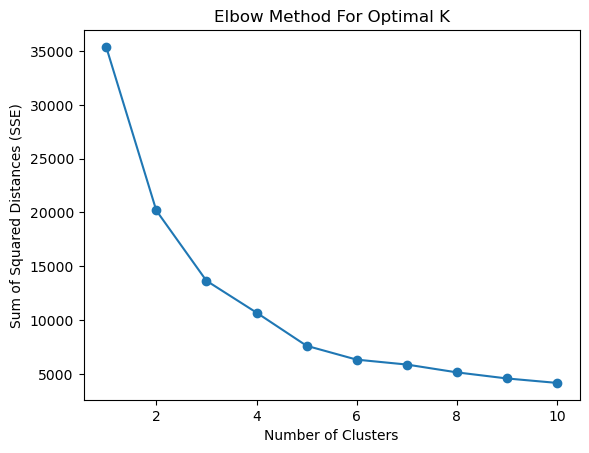

In [5]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the data for clustering
X = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]

# Elbow method to find optimal number of clusters
sse = []
k_range = range(1, 11)  # Change this to range from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

In [6]:
# We are clustering based on 'Age', 'Average_Spend', 'Visits_per_Week', and 'Promotion_Interest'
features = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
df['Cluster'] = kmeans.fit_predict(features)

# Rename clusters to 'Daily', 'Promotion', 'Weekend'
cluster_names = {0: 'Daily', 1: 'Promotion', 2: 'Weekend'}
df['Customer Group'] = df['Cluster'].map(cluster_names)

df.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CustomerID  Age  Average_Spend  Visits_per_Week  Promotion_Interest  \
0           1   56      18.206968         5.266897                   2   
1           2   46       5.633592         5.857006                   9   
2           3   32      13.947908         3.091996                   8   
3           4   60      37.010388         1.577059                  10   
4           5   25      40.557899         6.643140                   7   

   Cluster Customer Group  
0        2        Weekend  
1        2        Weekend  
2        2        Weekend  
3        0          Daily  
4        1      Promotion

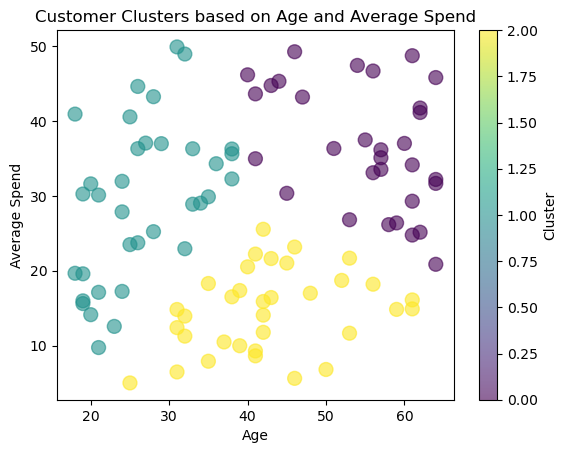

In [7]:

plt.scatter(df['Age'], df['Average_Spend'], c=df['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Average Spend')
plt.title('Customer Clusters based on Age and Average Spend')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.37


In [9]:

import pickle

pickle.dump(kmeans,open("kmeans.pkl",'wb'))

In [10]:

kmeans = pickle.load(open("kmeans.pkl",'rb'))

In [11]:
def clustering(age,avg_spend,visit_per_week, promotion_interest):
    new_customer = np.array([[age,avg_spend,visit_per_week, promotion_interest]])
    predicted_cluster = kmeans.predict(new_customer)
    
    if predicted_cluster[0]==0:
        return "Daily"
    elif predicted_cluster[0]==1:
        return "Weekend"
    else:
        return "Promotion"

In [12]:
age = 40
avg_spend = 30
visit_per_week= 4
promotion_interest= 7


predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

# Save the generated dataset as CSV
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Weekend


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [13]:
ge = 40
avg_spend = 10
visit_per_week= 1
promotion_interest= 0


predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

# Save the generated dataset as CSV
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Promotion


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
